In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import classification_report
from plot_cm import plot

In [2]:
root = "../../"

In [3]:
data=pd.read_excel(root+r"data\data_uji\data_ujiX1234.xlsx")
komentar2 = data.komentar_bersih.tolist()
komentar = data.komentar.tolist()
y_true  = data.label.tolist()
data.head()

,Column1,Unnamed: 0,Unnamed: 1,label,komentar,komentar_bersih
0,741.0,741.0,1,non spam,@nurtunggali hanya di @rissa_skincare y say.. ...,nurtunggali risa skin care y nan awas hati 2 o...
1,777.0,777.0,2,non spam,@legitenak hahahaha balajaer mah gitu kadang b...,legitenak nan balajaer mah gitu kadang buta sm...
2,790.0,790.0,3,non spam,"@bundanya.anak.anak lu lah, muka kayak mak la...",badan anak anak lu lah muka kayak mak lampir s...
3,855.0,855.0,4,non spam,"@lazarus_smith1717 anyway parameter kita beda,...",lazarus smith 1717 anyway parameter beda gue o...
4,869.0,869.0,5,non spam,@awukyu iyalah akun bodong yg doyan nyinyir ka...,awukyu iya akun bodong doyan nyinyir kaya lu o...


In [4]:
#load model
path = root+r"Pemodelan/data1/"

In [5]:
pembobotan_imbang_freq = joblib.load(path+"imbang/"+"pembobotan_tf.w")
pembobotan_imbang_bin = joblib.load(path+"imbang/"+"pembobotan_bin.w")

# CNB

In [36]:
cnb_tfidf = joblib.load(path+"imbang/"+"cnb_tfidf.model")
cnb_tf = joblib.load(path+"imbang/"+"cnb_tf.model")
cnb_bin = joblib.load(path+"imbang/"+"cnb_bin.model")

### 1. TFIDF CNB

              precision    recall  f1-score   support

    non spam       0.91      0.88      0.89       726
        spam       0.88      0.91      0.90       725

    accuracy                           0.89      1451
   macro avg       0.89      0.89      0.89      1451
weighted avg       0.89      0.89      0.89      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


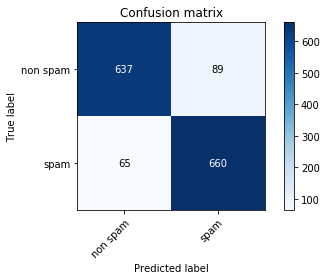

In [37]:
cnb_tfidf.set_params(alpha = 1)
# print(cnb_tfidf)
y_pred = cnb_tfidf.predict(pembobotan_imbang_freq.transform(komentar))
# target_names = ['spam','non spam']
# target_names = list(set(y_true))
# print(target_names)
# print(classification_report(y_true, y_pred, target_names=target_names))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))


              precision    recall  f1-score   support

    non spam       1.00      0.89      0.94       726
        spam       0.90      1.00      0.95       725

    accuracy                           0.94      1451
   macro avg       0.95      0.94      0.94      1451
weighted avg       0.95      0.94      0.94      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


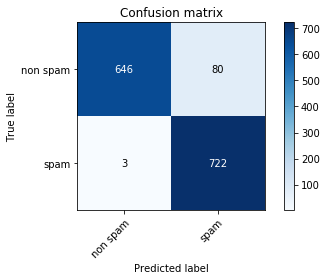

In [38]:
print("")
y_pred = cnb_tfidf.predict(pembobotan_imbang_freq.transform(komentar2))
# target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

### 2. TF CNB

              precision    recall  f1-score   support

    non spam       0.90      0.92      0.91       726
        spam       0.92      0.90      0.91       725

    accuracy                           0.91      1451
   macro avg       0.91      0.91      0.91      1451
weighted avg       0.91      0.91      0.91      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


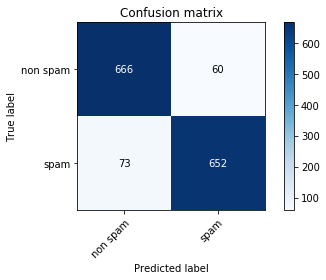

In [39]:
y_pred = cnb_tf.predict(pembobotan_imbang_freq.transform(komentar))
target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

              precision    recall  f1-score   support

    non spam       0.99      0.93      0.96       726
        spam       0.94      0.99      0.96       725

    accuracy                           0.96      1451
   macro avg       0.97      0.96      0.96      1451
weighted avg       0.97      0.96      0.96      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


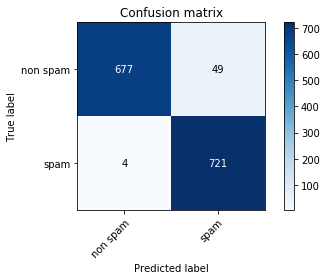

In [43]:

y_pred = cnb_tf.predict(pembobotan_imbang_freq.transform(komentar2))
target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

### 3. Bin  CNB

              precision    recall  f1-score   support

    non spam       0.90      0.91      0.90       726
        spam       0.91      0.90      0.90       725

    accuracy                           0.90      1451
   macro avg       0.90      0.90      0.90      1451
weighted avg       0.90      0.90      0.90      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


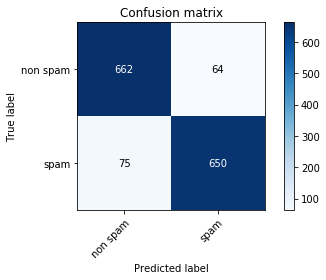

In [44]:
y_pred = cnb_bin.predict(pembobotan_imbang_bin.transform(komentar))
target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

              precision    recall  f1-score   support

    non spam       1.00      0.93      0.96       726
        spam       0.93      1.00      0.96       725

    accuracy                           0.96      1451
   macro avg       0.96      0.96      0.96      1451
weighted avg       0.96      0.96      0.96      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


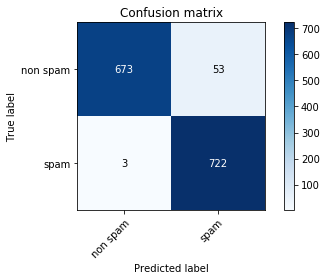

In [45]:

y_pred = cnb_bin.predict(pembobotan_imbang_bin.transform(komentar2))
target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

# Gaussian

In [6]:
gnb_tfidf = joblib.load(path+"imbang/"+"gnb_tfidf.model")
gnb_tf = joblib.load(path+"imbang/"+"gnb_tf.model")
gnb_bin = joblib.load(path+"imbang/"+"gnb_bin.model")

### 1. TFIDF

              precision    recall  f1-score   support

    non spam       0.86      0.84      0.85       726
        spam       0.85      0.86      0.85       725

    accuracy                           0.85      1451
   macro avg       0.85      0.85      0.85      1451
weighted avg       0.85      0.85      0.85      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


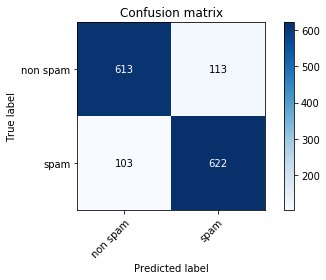

In [12]:
gnb_tfidf.var_smoothing=0.4
y_pred = gnb_tfidf.predict(pembobotan_imbang_freq.transform(komentar))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

              precision    recall  f1-score   support

    non spam       0.93      0.88      0.91       726
        spam       0.89      0.94      0.91       725

    accuracy                           0.91      1451
   macro avg       0.91      0.91      0.91      1451
weighted avg       0.91      0.91      0.91      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


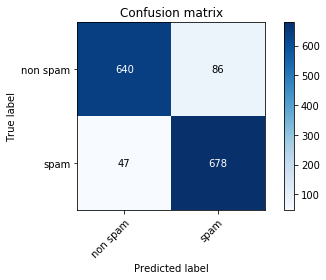

In [18]:
gnb_tfidf.var_smoothing=0.5
y_pred = gnb_tfidf.predict(pembobotan_imbang_freq.transform(komentar2))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

### 2. TF

              precision    recall  f1-score   support

    non spam       0.85      0.60      0.70       726
        spam       0.69      0.90      0.78       725

    accuracy                           0.75      1451
   macro avg       0.77      0.75      0.74      1451
weighted avg       0.77      0.75      0.74      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


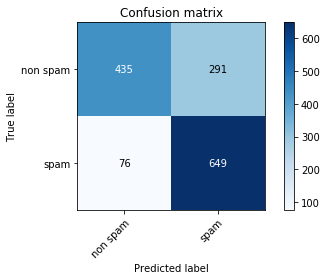

In [19]:
gnb_tf.var_smoothing=0.7
y_pred = gnb_tf.predict(pembobotan_imbang_freq.transform(komentar))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

              precision    recall  f1-score   support

    non spam       0.93      0.64      0.76       726
        spam       0.72      0.95      0.82       725

    accuracy                           0.79      1451
   macro avg       0.83      0.79      0.79      1451
weighted avg       0.83      0.79      0.79      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


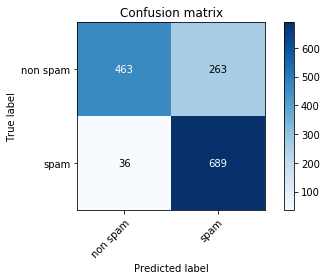

In [22]:
gnb_tf.var_smoothing=0.9
y_pred = gnb_tf.predict(pembobotan_imbang_freq.transform(komentar2))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

### 3. BIN

              precision    recall  f1-score   support

    non spam       0.87      0.57      0.69       726
        spam       0.68      0.92      0.78       725

    accuracy                           0.74      1451
   macro avg       0.77      0.74      0.73      1451
weighted avg       0.77      0.74      0.73      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


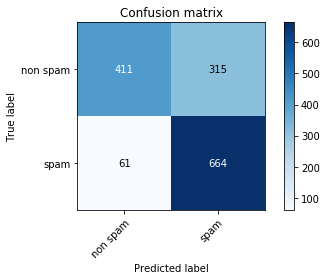

In [16]:
gnb_bin.var_smoothing=0.4
y_pred = gnb_bin.predict(pembobotan_imbang_bin.transform(komentar))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

              precision    recall  f1-score   support

    non spam       1.00      0.52      0.68       726
        spam       0.67      1.00      0.81       725

    accuracy                           0.76      1451
   macro avg       0.84      0.76      0.74      1451
weighted avg       0.84      0.76      0.74      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


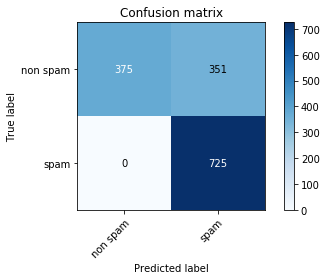

In [26]:
gnb_bin.var_smoothing=0.4
y_pred = gnb_bin.predict(pembobotan_imbang_bin.transform(komentar2))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

# NBC

In [30]:
nbc_bin = joblib.load(path+"imbang/"+"nbc_bin.model")
nbc_bin.alpha = 1

1
              precision    recall  f1-score   support

    non spam       0.87      0.60      0.71       726
        spam       0.69      0.91      0.79       725

    accuracy                           0.75      1451
   macro avg       0.78      0.75      0.75      1451
weighted avg       0.78      0.75      0.75      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


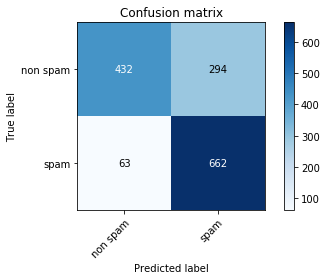

In [52]:
print(nbc_bin.alpha)
y_pred = nbc_bin.predict(np.array(komentar))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))
del y_pred


1
              precision    recall  f1-score   support

    non spam       0.98      0.56      0.71       726
        spam       0.69      0.99      0.81       725

    accuracy                           0.77      1451
   macro avg       0.84      0.77      0.76      1451
weighted avg       0.84      0.77      0.76      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


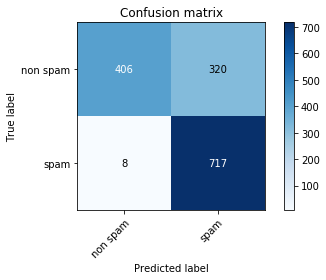

In [53]:

print(nbc_bin.alpha)
y_pred = nbc_bin.predict(np.array(komentar2))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))
del y_pred

In [54]:
# unique_labels([1,2,2,4],[1,2,12,1,1])